In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd

In [6]:
import datetime as dt

In [7]:
from flask import Flask, jsonify

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [9]:
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [10]:
#reflect an existing database into a new model
Base = automap_base()
#reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
#we can review all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
#Save the references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
#create our session link from python to the database
session = Session(engine)

In [14]:
#use inspector to check for column names
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [17]:
# #check for the specific values being provided by the data
engine.execute('SELECT * FROM measurement').fetchall()
engine.execute('SELECT * FROM station').fetchall()

In [18]:
#determine the last date in the data set
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date = recent[0]
last_date

'2017-08-23'

In [19]:
#determine the first date in the data set
recent = session.query(Measurement.date).order_by(Measurement.date.asc()).first()
first_date = recent[0]
first_date

'2010-01-01'

In [20]:
#Create a query that will retrieve the last 12 months of precipitation data
sel = [Measurement.date, Measurement.prcp]

ly_data = session.query(*sel).\
    filter (Measurement.date >= dt.date(2016,8,23)).all()

In [40]:
#Convert into a dataframe
prec_analysis = pd.DataFrame(ly_data)

In [41]:
prec_analysis['date'] = pd.to_datetime(prec_analysis['date'])
precip_analysis = prec_analysis.set_index('date')
precip_analysis.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


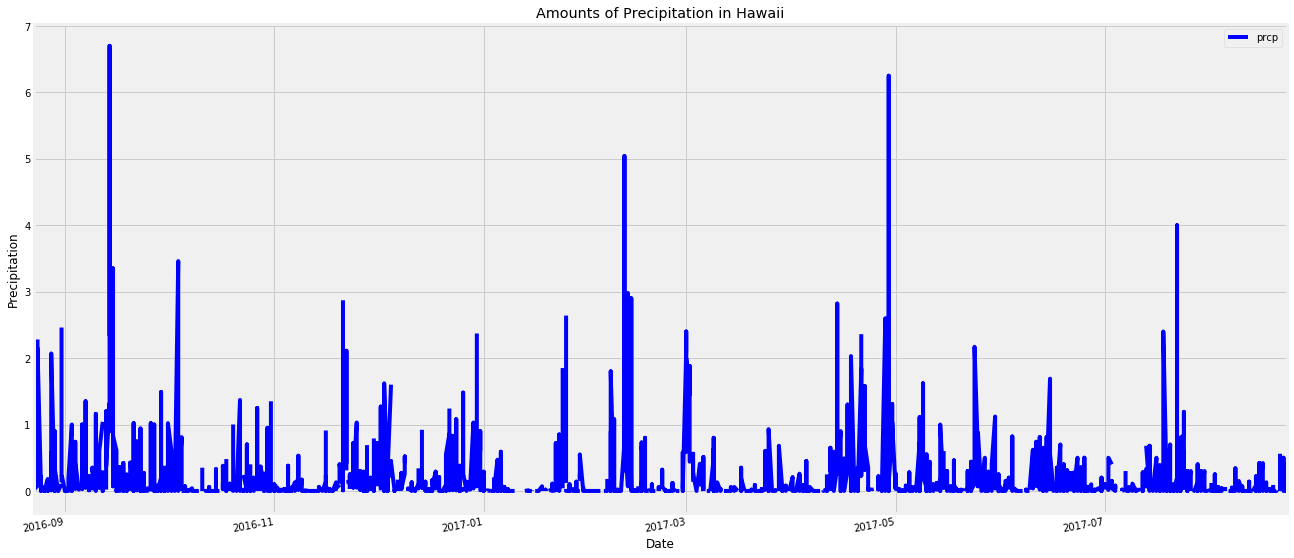

In [42]:
#Plot the results
plec_plot = precip_analysis.plot(figsize = (20,10), sort_columns=True, rot=10, use_index=True, legend=True, 
grid=True, color='b')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Amounts of Precipitation in Hawaii')
plt.show()

In [43]:
#Design a query to calculate the total number of stations
num_stat = session.query(Station.station).count()
num_stat

9

In [14]:
# Design a query to find the most active stations
session.query(Station.station, Station.name, func.count(Measurement.tobs)).\
    filter(Station.station==Measurement.station).\
    group_by(Station.name).\
    order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [15]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs) and plot on a histogram
session.query(Station.station, Station.name, func.max(Measurement.tobs)).\
    filter(Station.station==Measurement.station).\
    filter(Measurement.date >= dt.date(2016,8,23)).\
    group_by(Station.name).\
    order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519397', 'WAIKIKI 717.2, HI US', 87.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', 83.0),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 82.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 82.0),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 85.0),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 83.0),
 ('USC00517948', 'PEARL CITY, HI US', 87.0)]

In [16]:
#design a query that will obtain the last 12 months of observation data from the station with the highest number of observations
waikiki = session.query(Measurement.tobs).\
    filter(Measurement.station=='USC00519397').\
    filter(Measurement.date >= dt.date(2016,8,23)).all()

In [178]:
#convert the list into a format that will be recognized as a single list in plt
temps = [temp[0] for temp in waikiki]

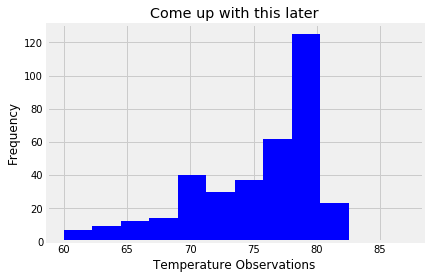

In [185]:
#plot a histogram of the data with 12 bins
plt.hist(temps, bins=12, color='b')
plt.xlabel('Temperature Observations')
plt.ylabel('Frequency')
plt.title('Come up with this later')
plt.show()

In [96]:
#use the calc_temps function to calculate the min, max, and avgerage temperature for a provided time range and plot the results
def calc_temps(start_date, end_date):
    query = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).all()

    average = query[0][2]
    err = query[0][1]-query[0][0]
    
    plt.figure(figsize=(2,6))
    plt.bar(1, average, yerr=err, tick_label='', color='salmon', alpha=0.8)
#     plt.ylabel('Temperature',weight='bold')
    plt.title('Trip Avg Temperature')
    plt.show()

    return query


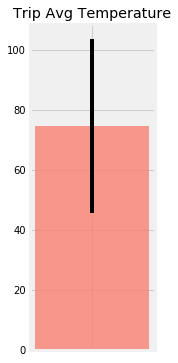

[(58.0, 87.0, 74.59058295964125)]


In [97]:
print(calc_temps('2016-08-23','2017-08-23'))